In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sqlite3
import pandas as pd
# Create a SQL connection to our SQLite database
con = sqlite3.connect("data\cruise_pre.db")
cur = con.cursor()
df_pre = pd.read_sql_query("SELECT * from cruise_pre", con)
# Verify that result of SQL query is stored in the dataframe
#print(df_pre.head())
con.close()


In [3]:
import sqlite3
import pandas as pd
con = sqlite3.connect("data\cruise_post.db")
cur = con.cursor()
df_post = pd.read_sql_query("SELECT * from cruise_post", con)
# Verify that result of SQL query is stored in the dataframe
#print(df_post.head())
con.close()

In [4]:
df = pd.concat((df_pre,df_post), axis=1) # to consolidate into one dataframe
# Verify that result of SQL query is stored in the dataframe
print(df.head())

  index  Gender Date of Birth         Source of Traffic  Onboard Wifi Service  \
0     0    None    05/10/1973  Direct - Company Website    A little important   
1     1  Female          None   Indirect - Social Media  Not at all important   
2     2  Female    22/07/1998  Indirect - Search Engine                  None   
3     3  Female    01/05/1970  Direct - Company Website        Very important   
4     4    Male    07/01/1960  Direct - Company Website    Somewhat important   

   Embarkation/Disembarkation time convenient  Ease of Online booking  \
0                                         3.0                     5.0   
1                                         4.0                     1.0   
2                                         3.0                     0.0   
3                                         4.0                     4.0   
4                                         4.0                     2.0   

   Gate location          Logging Onboard Dining Service  ...  Cleanliness

In [5]:
df.describe() # to check that all the numerical columns are in order

,index,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Online Check-in,Cabin Comfort,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,index,WiFi,Dining,Entertainment
count,133746.000000,118103.000000,115391.000000,116606.000000,118059.000000,113494.000000,119914.000000,113453.000000,119399.000000,115419.000000,115344.000000,133746.000000,64012.000000,133746.000000,73689.000000
mean,66872.500000,3.055850,2.758170,2.978526,3.249884,3.439574,3.383925,3.633416,3.308470,3.641844,3.285745,66872.500000,0.500578,0.499290,0.503142
std,38609.288889,1.526012,1.401888,1.277984,1.350811,1.321604,1.287508,1.178899,1.266476,1.177988,1.313328,38609.288889,0.500004,0.500001,0.499994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33436.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,33436.250000,0.000000,0.000000,0.000000
50%,66872.500000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,66872.500000,1.000000,0.000000,1.000000
75%,100308.750000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,100308.750000,1.000000,1.000000,1.000000
max,133745.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,133745.000000,1.000000,1.000000,1.000000


In [6]:
df.count() # to check that the missing values of all columns

index                                         133746
Gender                                        120290
Date of Birth                                 119062
Source of Traffic                             133746
Onboard Wifi Service                          114254
Embarkation/Disembarkation time convenient    118103
Ease of Online booking                        115391
Gate location                                 116606
Logging                                       133746
Onboard Dining Service                        116937
Online Check-in                               118059
Cabin Comfort                                 113494
Onboard Entertainment                         117833
Cabin service                                 119914
Baggage handling                              113453
Port Check-in Service                         119399
Onboard Service                               115419
Cleanliness                                   115344
Ext_Intcode                                   

In [7]:
df_distance=df.dropna(subset=['Cruise Distance']).reset_index() # clear na to prepare data for conversion to age
CatToNum =lambda x: ((x[-8:-3])) # to slice off 5 characters from Cruise Distance km value strings as numeric
CatToNum1 =lambda x: ((x[-11:-6])) # to slice off 5 characters from Cruise Distance miles value strings as numeric
# for loop to extract km values
for i in range (len(df_distance['Cruise Distance'])):
  try:
    df_distance.loc[i,'km values'] = CatToNum(df_distance.loc[i, 'Cruise Distance'])
    df_distance.loc[i,'km values'] = abs(float((df_distance.loc[i,'km values'])))
  except ValueError:
    df_distance.loc[i,'km values'] = CatToNum1(df_distance.loc[i, 'Cruise Distance'])
    df_distance.loc[i,'km values'] = 1.60934*abs(float((df_distance.loc[i,'km values'])))
#print(df_distance['km values']) # to inspect new df_distance 


In [9]:
mean_km = int(df_distance['km values'].mean()) # to get integer value of mean_km
#print(mean_km) # to verify mean_km value makes sense
mean_km_str = str(str(mean_km) +' KM') # to make mean_km_str
print(mean_km_str) # to inspect mean_km_str 
df['Cruise Distance'] = df['Cruise Distance'].fillna(mean_km_str) # to impute df with mean_km_str
#print(df['Cruise Distance'].head(20)) # to check fillna has worked
for i in range (len(df['Cruise Distance'])): # to make df['km values']
  try:
    df.loc[i,'km values'] = CatToNum(df.loc[i, 'Cruise Distance'])
    df.loc[i,'km values'] = abs(float((df.loc[i,'km values'])))
  except ValueError:
    df.loc[i,'km values'] = CatToNum1(df.loc[i, 'Cruise Distance'])
    df.loc[i,'km values'] = 1.60934*abs(float((df.loc[i,'km values'])))
df['km values']=df['km values'].astype(float) # to convert df['km values'] from object to float
print(df['km values'].describe()) # to inspect new df['km values'] 



1265 KM


count    133746.000000
mean       1265.083314
std        1037.259430
min          31.000000
25%         479.000000
50%        1006.500000
75%        1660.000000
max        7987.154420
Name: km values, dtype: float64

In [57]:
import numpy as np
import pandas as pd
from datetime import datetime, date
def AGE(born): #function to convert DOB to age, as model can only process numeric data
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))

#print(AGE('23/08/2006')) # verified function can work

In [58]:
df_DOB=df.dropna(subset=['Date of Birth']).reset_index() # clear na to prepare data for conversion to age
display(df_DOB['Date of Birth']) # to check dropna has worked
dt_Age=[] # to construct data-Age array
for i in range (len(df_DOB['Date of Birth'])):
  try:
    dt_Age = np.append(dt_Age, AGE(df_DOB.loc[i, 'Date of Birth']))
  except ValueError:
    df_DOB.drop(df_DOB.index[i])
#display(dt_Age.shape) # to check data_Age array shape
#display(dt_Age) # to inspect data_Age array
mean_age = dt_Age.mean() # to find mean of data_Age
print(mean_age)
mean_DOB = "01/01/1984" # manually convert mean age to mean DOB
df['Date of Birth'] = df['Date of Birth'].fillna(mean_DOB) # to impute to na entries with mean DOB
#display(df['Date of Birth'].head()) # to inspect new df['Date of Birth']

0         05/10/1973
1         22/07/1998
2         01/05/1970
3         07/01/1960
4         07/01/1960
             ...    
119057    22/10/1962
119058    10/07/1987
119059    14/09/1988
119060    23/10/2012
119061    07/09/1996
Name: Date of Birth, Length: 119062, dtype: object

39.18249746263955


In [59]:
df['Date of Birth']=df['Date of Birth'].fillna('01/01/1984') # feature engineering - to clear na
#display(df['Date of Birth']) # to check that fillna has worked
#display(AGE(df.loc[0, 'Date of Birth'])) # to check defined function AGE can work 
#DOBtoAge=lambda x: AGE(x) # tried but cannot work
#df[0,'Age']=AGE(df.loc[0, 'Date of Birth']) # tried this format and it worked
for i in range (len(df['Date of Birth'])):
  try:
    df.loc[i, 'Age']=AGE(df['Date of Birth'][i])
  except ValueError:
    df['Age'][i]=mean_age 
  #display(df.loc[i, 'Age']) # to check algo is updating age
display(df['Age'])
display(df.head())

0         50.0
1         39.0
2         25.0
3         53.0
4         63.0
          ... 
133741    39.0
133742    35.0
133743    10.0
133744    39.0
133745    27.0
Name: Age, Length: 133746, dtype: float64

,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,index,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment,km values,Age
0,0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,...,0,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0,3567.0,50.0
1,1,Female,01/01/1984,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,...,1,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0,672.0,39.0
2,2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,...,2,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0,1167.0,25.0
3,3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,...,3,Lapras,Deluxe,280 KM,LB243DMKCFL,NaN,0,1.0,280.0,53.0
4,4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,...,4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN,1842.6943,63.0


In [60]:
df['Ticket Type'].unique() # to find out how many Ticket Types
df['Gender'].unique() # to find if there is a third gender type

array([None, 'Female', 'Male'], dtype=object)

In [61]:
# Making Dictionaries of ordinal features

Ticket_Type_map = {
    'Standard'    :    1,
    'Deluxe'      :    2,
    'Luxury'      :    3
}

Gender_map = {
    'Female':  1.0,
    'Male'  :  2.0
}

Source_of_Traffic_map = {
    'Direct - Company Website'      :    3,
    'Direct - Email Marketing'      :    2,
    'Indirect - Search Engine'      :    1
}

Onboard_Wifi_Service_map = {
    'Not at all important':1, 'A little important':2, 'Somewhat important':3, 'Very important':4, 'Extremely important':5
}

Onboard_Dining_Service_map = {
    'Not at all important':1, 'A little important':2, 'Somewhat important':3, 'Very important':4, 'Extremely important':5
}

Onboard_Entertainment_map = {
    'Not at all important':1, 'A little important':2, 'Somewhat important':3, 'Very important':4, 'Extremely important':5
}
# Transform ordinal categorical features into numerical features

def encode(df1):
    df1.loc[:,'Ticket Type'] = df1['Ticket Type'].map(Ticket_Type_map)
    df1.loc[:,'Gender'] = df1['Gender'].map(Gender_map)
    df1.loc[:,'Source of Traffic'] = df1['Source of Traffic'].map(Source_of_Traffic_map)
    df1.loc[:,'Onboard Wifi Service'] = df1['Onboard Wifi Service'].map(Onboard_Wifi_Service_map)
    df1.loc[:,'Onboard Dining Service'] = df1['Onboard Dining Service'].map(Onboard_Dining_Service_map)
    df1.loc[:,'Onboard Entertainment'] = df1['Onboard Entertainment'].map(Onboard_Entertainment_map)
    return df1

df = encode(df)
display(df) # to inspect df


,index,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,...,index,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment,km values,Age
0,0,NaN,05/10/1973,3.0,2.0,3.0,5.0,3.0,01/01/2023 0:00,4.0,...,0,Blastoise,NaN,3567 KM,LB446RWOOZI,1.0,1,1.0,3567.0,50.0
1,1,1.0,01/01/1984,NaN,1.0,4.0,1.0,NaN,01/01/2023 0:01,4.0,...,1,Blastoise,2.0,672 KM,LB138HKBECM,NaN,0,1.0,672.0,39.0
2,2,1.0,22/07/1998,1.0,NaN,3.0,0.0,5.0,01/01/2023 0:02,NaN,...,2,IAPRAS,2.0,1167 KM,BL713UHBAAN,NaN,0,0.0,1167.0,25.0
3,3,1.0,01/05/1970,3.0,4.0,4.0,4.0,4.0,01/01/2023 0:05,3.0,...,3,Lapras,2.0,280 KM,LB243DMKCFL,NaN,0,1.0,280.0,53.0
4,4,2.0,07/01/1960,3.0,3.0,4.0,2.0,NaN,01/01/2023 0:06,1.0,...,4,Lapras,1.0,1145 Miles,LB218CFLOBS,NaN,1,NaN,1842.6943,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133741,133741,1.0,01/01/1984,1.0,2.0,1.0,1.0,4.0,31/08/2023 23:38,NaN,...,133741,Blastoise,1.0,1506 KM,LB957GHIRBD,NaN,1,NaN,1506.0,39.0
133742,133742,1.0,14/09/1988,2.0,2.0,2.0,NaN,2.0,31/08/2023 23:38,3.0,...,133742,Blastoise,NaN,240 KM,BL409CVKQKQ,1.0,0,1.0,240.0,35.0
133743,133743,2.0,23/10/2012,2.0,5.0,5.0,5.0,5.0,31/08/2023 23:41,5.0,...,133743,Blastoise,3.0,-1947 KM,BL343MAXXIT,1.0,0,1.0,1947.0,10.0
133744,133744,1.0,01/01/1984,1.0,2.0,1.0,1.0,4.0,31/08/2023 23:43,NaN,...,133744,Blastoise,1.0,1506 KM,LB957GHIRBD,NaN,1,NaN,1506.0,39.0


print(df.info())
print(dtype(df['km values']))

<AxesSubplot:>

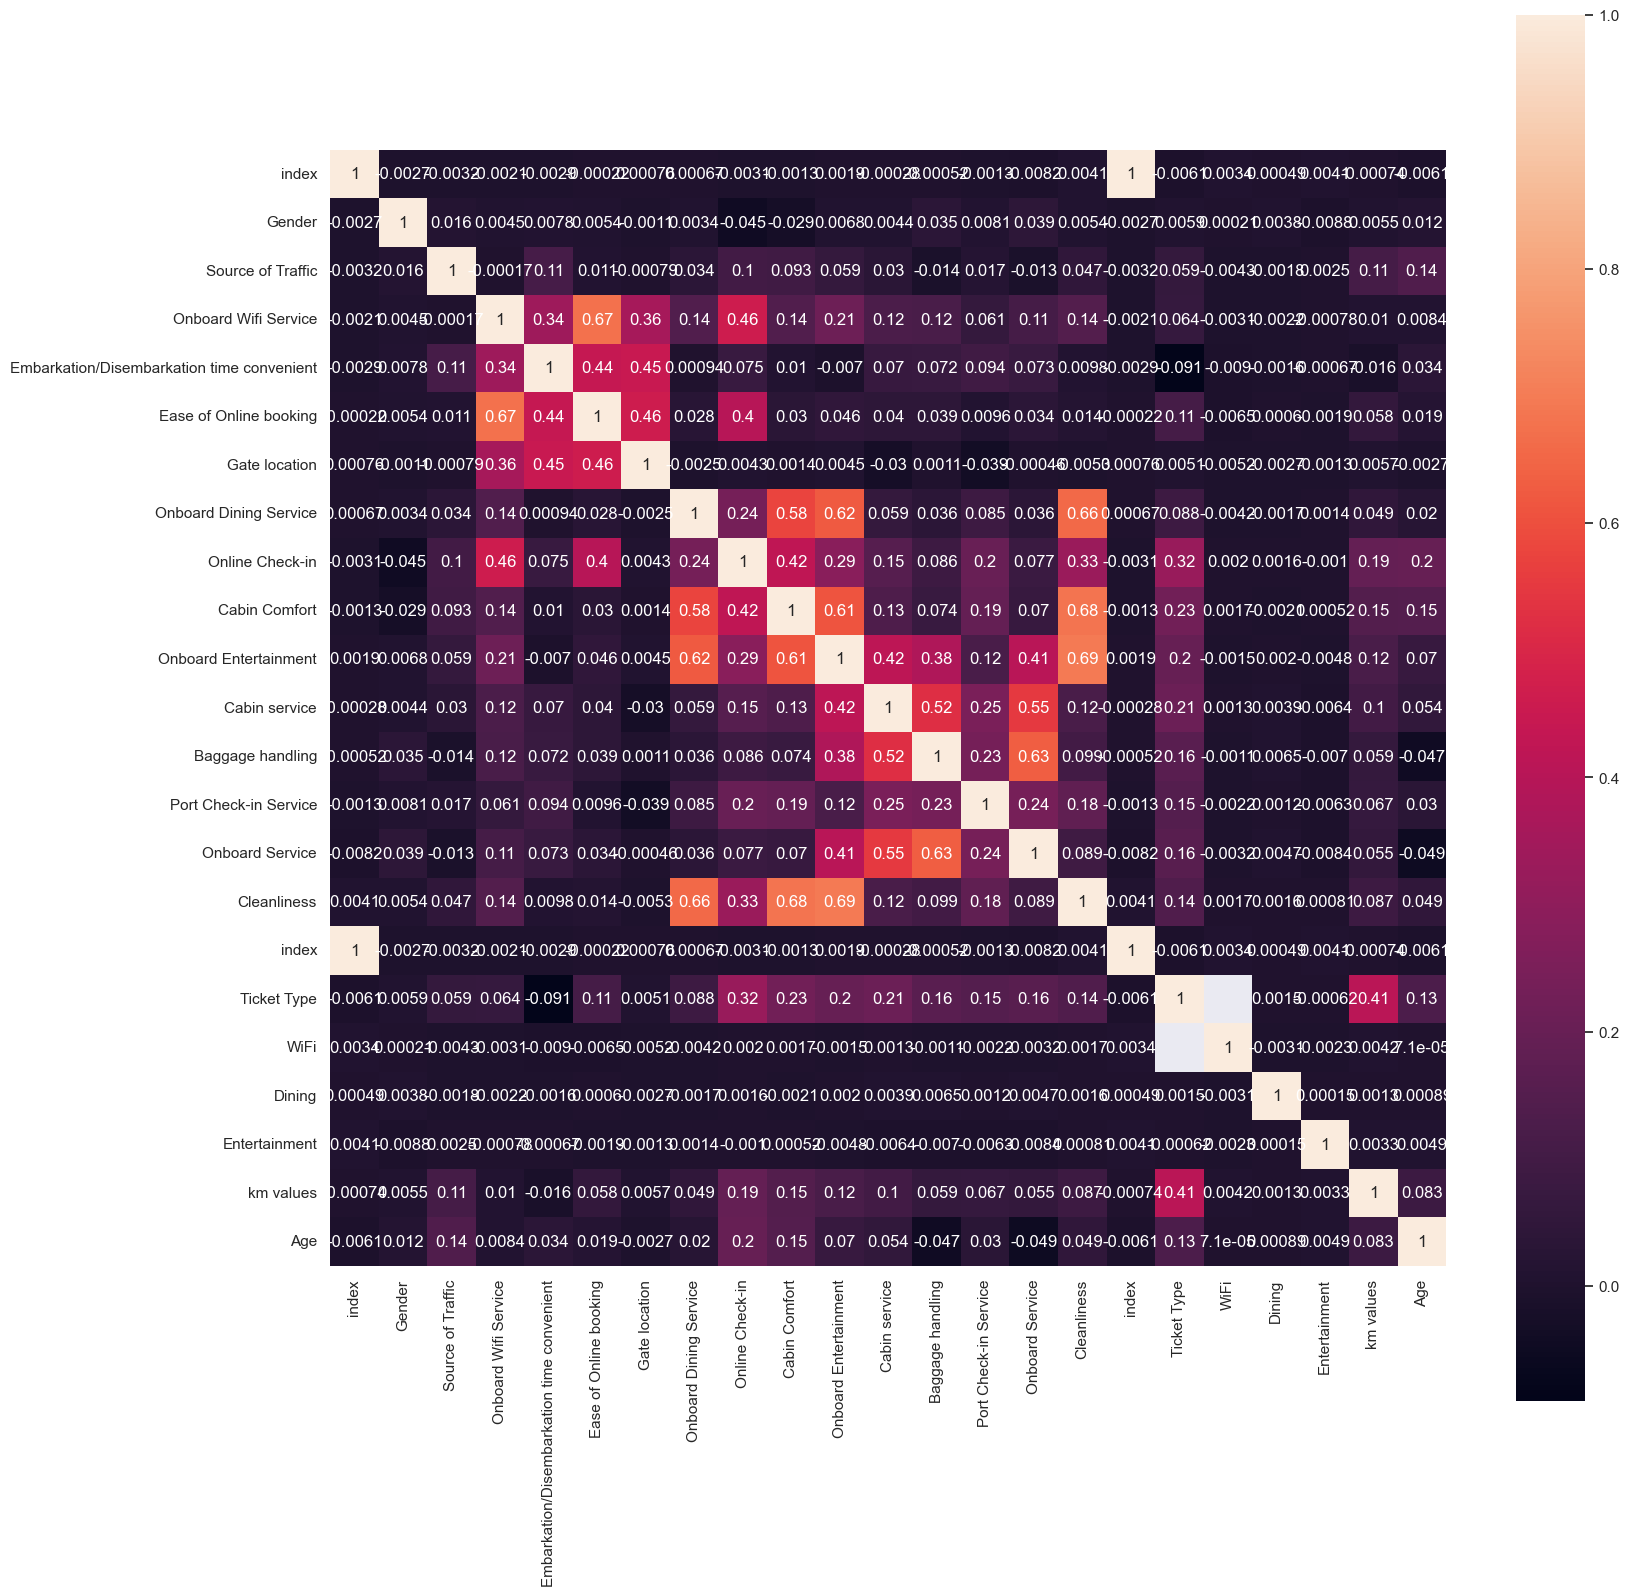

In [99]:
# heatmap of correlation
import seaborn as sns
sns.set(rc={"figure.figsize":(18, 18)})
sns.heatmap(df.corr(), annot=True, square=True) # to plot heat map
# from the heat map, target Ticket Type has larger correlation with 'Online Check-in', 'Cabin Comfort','Baggage handling','Port Check-in Service','Onboard Service','Cleanliness' & 'Age'.

In [93]:
num_cols = ['km values','Age', 'Source of Traffic', 'Onboard Wifi Service','Onboard Dining Service', 'Onboard Entertainment',
            'Embarkation/Disembarkation time convenient','Ease of Online booking','Online Check-in',
            'Cabin Comfort','Cabin service','Baggage handling','Port Check-in Service','Onboard Service',
            'Cleanliness'] # all numeric and ordinal categorical variables correlated to target Ticket Type
                           # logically from cruise_pre data, that of cruise_post would not qualify
# would have incorporated Cruise Distance since it might have been available pre_cruise, if not for time constraint in preparing this report
cat_cols = ['Gender', 'Gate location'] # these are the caategorical features
cat_post_cols = ['WiFi', 'Dining', 'Entertainment'] # for lineplots on these variables

In [65]:
for i in num_cols:
  k=df[[i, 'Ticket Type']].groupby(['Ticket Type'], as_index=False).mean().sort_values(by=i, ascending=False)
  display(k) # plot crosstab to visualise correlation of target vaiable Ticket Type with features
  # the crosstab results below, appears to agree with the heat map, with target Ticket Type having a larger correlation with 'km values','Online Check-in','Cabin Comfort','Baggage handling','Port Check-in Service','Onboard Service','Cleanliness' & 'Age'(in descending order).

,Ticket Type,km values
2,3.0,1726.544253
0,1.0,843.842150
1,2.0,843.362396


,Ticket Type,Age
2,3.0,41.062744
1,2.0,38.633124
0,1.0,37.213143


,Ticket Type,Source of Traffic
1,2.0,2.415457
2,3.0,2.379204
0,1.0,2.298288


,Ticket Type,Onboard Wifi Service
2,3.0,2.891202
1,2.0,2.833804
0,1.0,2.723250


,Ticket Type,Onboard Dining Service
2,3.0,3.331208
1,2.0,3.117111
0,1.0,3.088245


,Ticket Type,Onboard Entertainment
2,3.0,3.640841
1,2.0,3.125414
0,1.0,3.096544


,Ticket Type,Embarkation/Disembarkation time convenient
1,2.0,3.210678
0,1.0,3.193755
2,3.0,2.907512


,Ticket Type,Ease of Online booking
2,3.0,2.917732
1,2.0,2.656472
0,1.0,2.602714


,Ticket Type,Online Check-in
2,3.0,3.717087
1,2.0,2.881653
0,1.0,2.809747


,Ticket Type,Cabin Comfort
2,3.0,3.759013
1,2.0,3.172512
0,1.0,3.139388


,Ticket Type,Cabin service
2,3.0,3.683517
0,1.0,3.121699
1,2.0,3.037569


,Ticket Type,Baggage handling
2,3.0,3.845447
0,1.0,3.452683
1,2.0,3.340068


,Ticket Type,Port Check-in Service
2,3.0,3.521995
0,1.0,3.125274
1,2.0,3.006224


,Ticket Type,Onboard Service
2,3.0,3.848560
0,1.0,3.460465
1,2.0,3.391054


,Ticket Type,Cleanliness
2,3.0,3.481470
1,2.0,3.120752
0,1.0,3.105674


In [35]:
for i in cat_cols:
  k=df[[i, 'Ticket Type']].groupby(['Ticket Type'], as_index=False).mean().sort_values(by=i, ascending=False)
  display(k)
  # from crosstab results below, Gender has small correction with target Ticket Type, but almost indifference with Gate location

,Ticket Type,Gender
2,3.0,1.498315
0,1.0,1.492269
1,2.0,1.469770


,Ticket Type,Gate location
2,3.0,2.985577
1,2.0,2.984331
0,1.0,2.971987


In [ ]:
#df.dropna(subset='WiFi', inplace=True) # dropna did not help to resolve NaN in results
#display(df[['Ticket Type', 'WiFi']])
#df.dropna(subset='Dining', inplace=True) # dropna did not help to resolve NaN in results
#df.dropna(subset='Entertainment', inplace=True) # dropna did not help to resolve NaN in results
for i in cat_post_cols: # to print crosstab with Ticket Type for correlation visualisation
  k=df[[i, 'Ticket Type']].groupby(['Ticket Type'], as_index=False).mean().sort_values(by=i, ascending=False)
  display(k)
# cruise post data crosstab vs Ticket Types, i.e. that of WiFi, Dining and Entertainment show the respective satisfaction scores
# as shown in results below, some Ticket Types vs WiFi/Entertainment have too many NaN to establish any figures, so those means are NaN
# generally speaking the satisfaction scores (means) hover about 0.5, indicating only half the customers are satsified with the services.

,Ticket Type,WiFi
2,3.0,0.500717
0,1.0,NaN
1,2.0,NaN


,Ticket Type,Dining
2,3.0,0.502022
0,1.0,0.500480
1,2.0,0.498789


,Ticket Type,Entertainment
1,2.0,0.504358
2,3.0,0.503437
0,1.0,NaN


['Blastoise' 'IAPRAS' 'Lapras' None 'blast' 'lap' 'blastoise' 'blast0ise'
 'lapras']
['blastoise' 'lapras' None 'blast' 'lap']


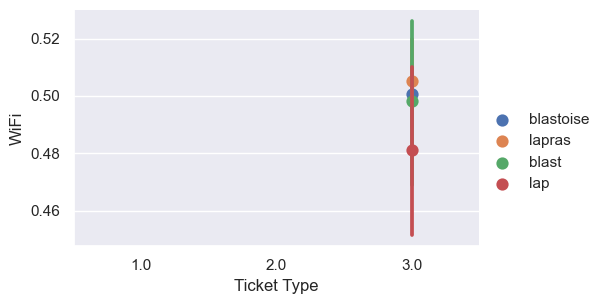

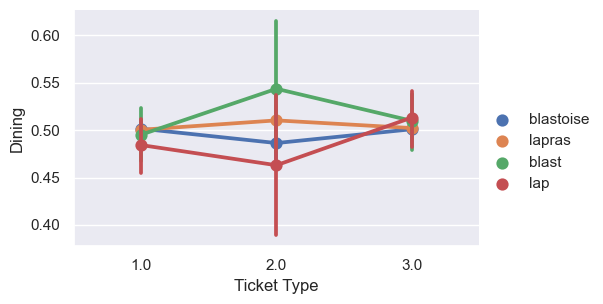

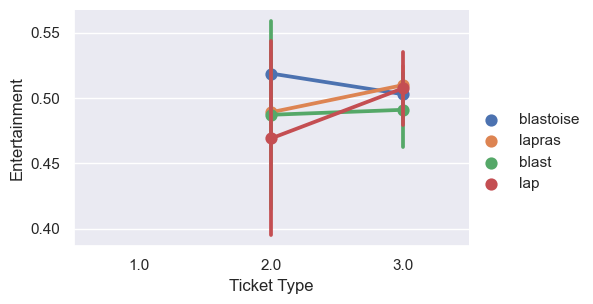

In [36]:
print(df['Cruise Name'].unique()) # to find out the various cruise names
df['Cruise Name']=df['Cruise Name'].replace('Blastoise', 'blastoise') # to convert different spelling of same cruise name
df['Cruise Name']=df['Cruise Name'].replace('blast0ise', 'blastoise') # to convert different spelling of same cruise name
df['Cruise Name']=df['Cruise Name'].replace('Lapras', 'lapras') # to convert different spelling of same cruise name
df['Cruise Name']=df['Cruise Name'].replace('IAPRAS', 'lapras') # to convert different spelling of same cruise name
print(df['Cruise Name'].unique()) # to verify .replace function has worked.
grid = sns.FacetGrid(df, height=3.2, aspect=1.6) # to do lineplot for presentation of WiFi/Dining/Entertainment results
grid.map(sns.pointplot, 'Ticket Type', 'WiFi', 'Cruise Name', palette='deep', order=None, hue_order=None)
grid.add_legend()
grid = sns.FacetGrid(df, height=3.2, aspect=1.6)
grid.map(sns.pointplot, 'Ticket Type', 'Dining', 'Cruise Name', palette='deep', order=None, hue_order=None)
grid.add_legend()
grid = sns.FacetGrid(df, height=3.2, aspect=1.6)
grid.map(sns.pointplot, 'Ticket Type', 'Entertainment', 'Cruise Name', palette='deep', order=None, hue_order=None)
grid.add_legend()

# lineplots below show comparisons of WiFi/Dining/Entertainment satisfaction scores across various Cruise Names.
# ShipSail management may take note and make strategies to improve satisfaction scores.

In [44]:
print(df['Ticket Type'].head(10)) # to inspect df['Ticket Type'] before fillna
mode=df['Ticket Type'].dropna().mode()[0] # to get Ticket Type mode for fillna
print(mode)
df['Ticket Type']=df['Ticket Type'].fillna(mode) # fillna with mode, to complete preprocessing Target df
display(df['Ticket Type'].head(10)) # veify fillna has worked

0    3.0
1    2.0
2    2.0
3    2.0
4    1.0
5    1.0
6    1.0
7    3.0
8    2.0
9    3.0
Name: Ticket Type, dtype: float64
3.0


0    3.0
1    2.0
2    2.0
3    2.0
4    1.0
5    1.0
6    1.0
7    3.0
8    2.0
9    3.0
Name: Ticket Type, dtype: float64